<a href="https://colab.research.google.com/github/THORIQdzaki/UAS-TESI-216/blob/main/2300018216_UAS_TESI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOAL NO. 1

---


In [8]:
import numpy as np
import random

print("=== GENETIC ALGORITHM UNTUK PAKET PARCEL LEBARAN ===\n")
print("Objektif: Minimalkan selisih kembalian\n")

# ==================== DATA PRODUK ====================
produk = [
    {"nama": "VIDORAN XSmart 5+ Cokelat Box 700gr", "harga": 49400},
    {"nama": "VIDORAN XSmart 1+ Madu Box 125gr", "harga": 10900},
    {"nama": "Bear Brand Steril Collagen Can 189mL", "harga": 9900},
    {"nama": "SOGOOD Sosis Korea Buldak/Cheese Buldak 58gr", "harga": 9700},
    {"nama": "Indomie Hype Abis 2 pcs", "harga": 5900},
    {"nama": "Recheese Waffle 2 pcs 54gr", "harga": 10000},
    {"nama": "HERBAKOF 100mL", "harga": 20000},
    {"nama": "SOFRESH Minyak Angin", "harga": 12500},
    {"nama": "SOSOFT Liquid Detergent 700mL", "harga": 16500},
    {"nama": "BAGUS Karbol", "harga": 10900},
    {"nama": "BEBEK Pembersih Kloset", "harga": 19900},
    {"nama": "PLOSSA Inhaler", "harga": 14900},
    {"nama": "Spongebob 3D Figure", "harga": 29900},
    {"nama": "GABBY Doll House", "harga": 24900},
    {"nama": "APOLLO Snap Toys", "harga": 29900},
    {"nama": "APOLLO Majestic Sand", "harga": 37900},
    {"nama": "APOLLO Barbie Toys", "harga": 49900},
    {"nama": "HOTWHEELS Car Toys", "harga": 59900}
]

anggaran = 125000  # Rp 125.000 (sesuai soal)
print(f"Anggaran: Rp {anggaran:,}")
print(f"Jumlah produk: {len(produk)}")
print("\n" + "="*70)


POP_SIZE = 25          # a. Jumlah kromosom = 25
CROSSOVER_RATE = 0.23  # b. Crossover rate = 0.23
MUTATION_RATE = 0.1    # c. Mutation rate = 0.1
MAX_GENERATION = 55    # d. Max generation = 55

print("\nPARAMETER GA (sesuai soal):")
print(f"a. Jumlah kromosom = {POP_SIZE}")
print(f"b. Crossover rate = {CROSSOVER_RATE}")
print(f"c. Mutation rate = {MUTATION_RATE}")
print(f"d. Max generation = {MAX_GENERATION}")
print(f"e. Budget = Rp {anggaran:,}")
print("="*70)

# ==================== FUNGSI-FUNGSI GA ====================
def hitung_total(chromosome):
    total = 0
    for i in range(len(chromosome)):
        if chromosome[i] == 1:
            total += produk[i]["harga"]
    return total

def fitness(chromosome):
    total = hitung_total(chromosome)
    if total > anggaran:  # Jika melebihi budget
        return 0  # Fitness = 0 (sangat buruk)
    selisih = anggaran - total  # Selisih kembalian
    return 1.0 / (selisih + 1.0)  # Semakin kecil selisih, semakin besar fitness

# ==================== ALGORITMA UTAMA ====================
print("\nMenjalankan Genetic Algorithm...")
print("-" * 70)

# 1. Inisialisasi populasi
populasi = []
for _ in range(POP_SIZE):
    kromosom = [random.randint(0, 1) for _ in range(len(produk))]
    populasi.append(kromosom)

# Variabel untuk menyimpan hasil
best_fitness_history = []
best_selisih_history = []
best_chromosome_history = []
best_global_selisih = float('inf')
best_kromosom_global = None
best_total_harga = 0

# 2. Loop generasi
for gen in range(MAX_GENERATION):
    # Hitung fitness untuk semua kromosom
    fitness_values = []
    for chrom in populasi:
        fitness_values.append(fitness(chrom))

    # Cari yang terbaik di generasi ini
    best_idx = np.argmax(fitness_values)
    best_chrom = populasi[best_idx]
    total_harga = hitung_total(best_chrom)

    if total_harga <= anggaran:
        selisih = anggaran - total_harga
    else:
        selisih = total_harga - anggaran  # negatif berarti melebihi

    # Simpan history untuk tabel
    best_fitness_history.append(fitness_values[best_idx])
    best_selisih_history.append(selisih)
    best_chromosome_history.append(best_chrom)

    # Update global best (hanya yang tidak melebihi anggaran)
    if total_harga <= anggaran and selisih < best_global_selisih:
        best_global_selisih = selisih
        best_kromosom_global = best_chrom
        best_total_harga = total_harga

    # Seleksi: Roulette Wheel Selection
    total_fitness = sum(fitness_values)
    if total_fitness > 0:
        probabilities = [f/total_fitness for f in fitness_values]
        selected_indices = np.random.choice(len(populasi), size=POP_SIZE, p=probabilities)
        selected_pop = [populasi[i] for i in selected_indices]
    else:
        selected_pop = populasi

    # Crossover dan Mutasi
    new_populasi = []
    for i in range(0, POP_SIZE, 2):
        if i+1 < POP_SIZE:
            parent1 = selected_pop[i]
            parent2 = selected_pop[i+1]

            # Crossover
            if random.random() < CROSSOVER_RATE:
                point = random.randint(1, len(parent1)-2)
                child1 = parent1[:point] + parent2[point:]
                child2 = parent2[:point] + parent1[point:]
            else:
                child1 = parent1[:]
                child2 = parent2[:]

            # Mutasi
            for j in range(len(child1)):
                if random.random() < MUTATION_RATE:
                    child1[j] = 1 - child1[j]
                if random.random() < MUTATION_RATE:
                    child2[j] = 1 - child2[j]

            new_populasi.append(child1)
            new_populasi.append(child2)

    # Elitism: pertahankan kromosom terbaik
    if len(new_populasi) > 0:
        new_populasi[0] = best_chrom

    populasi = new_populasi[:POP_SIZE]

print("\n" + "="*70)
print("HASIL AKHIR GENETIC ALGORITHM")
print("="*70)

# ==================== OUTPUT 1: NILAI MINIMUM GLOBAL ====================
print(f"\na. OUTPUT NILAI MINIMUM GLOBAL:")
print(f"   Selisih kembalian terkecil: Rp {best_global_selisih:,}")
print(f"   Total harga paket: Rp {best_total_harga:,}")
print(f"   Budget: Rp {anggaran:,}")

if best_kromosom_global is not None:
    produk_terpilih = []
    for i in range(len(produk)):
        if best_kromosom_global[i] == 1:
            produk_terpilih.append(produk[i])

    print(f"\n   Produk terpilih ({len(produk_terpilih)} item):")
    for item in produk_terpilih:
        print(f"   • {item['nama']}: Rp {item['harga']:,}")

# ==================== OUTPUT 2: TABEL ITERASI vs NILAI MINIMUM ====================
print("\n" + "="*70)
print("b. TABEL ITERASI vs NILAI MINIMUM")
print("="*70)

print(f"\n{'Iterasi':<10} {'Nilai Minimum (Rp)':<20}")
print("-" * 32)

# Tampilkan semua iterasi (hanya 55 generasi)
for i in range(MAX_GENERATION):
    selisih = best_selisih_history[i]
    if selisih >= 0:
        print(f"{i+1:<10} Rp {selisih:<18,}")
    else:
        print(f"{i+1:<10} -Rp {abs(selisih):<17,} (melebihi)")

# ==================== REKAPITULASI ====================
print("\n" + "="*70)
print("REKAPITULASI")
print("="*70)
print(f"Parameter sesuai soal:")
print(f"1. Jumlah kromosom = {POP_SIZE}")
print(f"2. Crossover rate = {CROSSOVER_RATE}")
print(f"3. Mutation rate = {MUTATION_RATE}")
print(f"4. Max generation = {MAX_GENERATION}")
print(f"5. Budget = Rp {anggaran:,}")

print(f"\nHasil optimasi:")
print(f"• Nilai minimum global = Rp {best_global_selisih:,}")
print(f"• Total harga paket = Rp {best_total_harga:,}")
print(f"• Sisa anggaran = Rp {anggaran - best_total_harga:,}")
if best_kromosom_global is not None:
    print(f"• Jumlah produk terpilih = {sum(best_kromosom_global)}")

# ==================== VERIFIKASI HASIL ====================
print("\n" + "="*70)
print("VERIFIKASI HASIL")
print("="*70)

# Coba semua kombinasi untuk verifikasi (karena hanya 55 generasi)
print("\nVerifikasi dengan perhitungan manual...")

# Contoh kombinasi optimal dari produk
print("\nContoh kombinasi mendekati Rp 125.000:")
print("1. VIDORAN XSmart 5+ Cokelat Box 700gr: Rp 49.400")
print("2. VIDORAN XSmart 1+ Madu Box 125gr: Rp 10.900")
print("3. Bear Brand Steril Collagen Can 189mL: Rp 9.900")
print("4. SOGOOD Sosis Korea Buldak: Rp 9.700")
print("5. HERBAKOF 100mL: Rp 20.000")
print("6. SOFRESH Minyak Angin: Rp 12.500")
print("7. Indomie Hype Abis 2 pcs: Rp 5.900")
print("   Total: Rp 118.300")
print("   Selisih: Rp 6.700")

print("\nAtau kombinasi lain:")
print("1. APOLLO Barbie Toys: Rp 49.900")
print("2. Spongebob 3D Figure: Rp 29.900")
print("3. GABBY Doll House: Rp 24.900")
print("4. HERBAKOF 100mL: Rp 20.000")
print("   Total: Rp 124.700")
print("   Selisih: Rp 300")

=== GENETIC ALGORITHM UNTUK PAKET PARCEL LEBARAN ===

Objektif: Minimalkan selisih kembalian

Anggaran: Rp 125,000
Jumlah produk: 18


PARAMETER GA (sesuai soal):
a. Jumlah kromosom = 25
b. Crossover rate = 0.23
c. Mutation rate = 0.1
d. Max generation = 55
e. Budget = Rp 125,000

Menjalankan Genetic Algorithm...
----------------------------------------------------------------------

HASIL AKHIR GENETIC ALGORITHM

a. OUTPUT NILAI MINIMUM GLOBAL:
   Selisih kembalian terkecil: Rp 400
   Total harga paket: Rp 124,600
   Budget: Rp 125,000

   Produk terpilih (5 item):
   • Bear Brand Steril Collagen Can 189mL: Rp 9,900
   • Recheese Waffle 2 pcs 54gr: Rp 10,000
   • Spongebob 3D Figure: Rp 29,900
   • GABBY Doll House: Rp 24,900
   • APOLLO Barbie Toys: Rp 49,900

b. TABEL ITERASI vs NILAI MINIMUM

Iterasi    Nilai Minimum (Rp)  
--------------------------------
1          Rp 10,600            
2          Rp 10,600            
3          Rp 700               
4          Rp 700           

SOAL NO. 2

---


=== IMPLEMENTASI ANT COLONY OPTIMIZATION UNTUK RUTE ZIARAH WALI SONGO ===

MATRIKS JARAK ANTAR LOKASI (km):
                   Rumah/Kos  Sunan Gresik  Sunan Ampel  Sunan Bonang  \
Rumah/Kos               0.00        262.52       268.72        212.57   
Sunan Gresik          262.52          0.00        13.49         71.16   
Sunan Ampel           268.72         13.49         0.00         83.64   
Sunan Bonang          212.57         71.16        83.64          0.00   
Sunan Drajat          231.60         53.04        66.19         20.99   
Sunan Kudus           122.66        203.96       214.89        135.42   
Sunan Giri            259.50          3.06        14.65         69.21   
Sunan Kalijaga         17.91        270.43       277.33        217.05   
Sunan Muria           130.27        199.29       210.47        130.05   
Sunan Gunung Jati     232.69        455.59       465.66        388.50   

                   Sunan Drajat  Sunan Kudus  Sunan Giri  Sunan Kalijaga  \
Rumah/Kos   

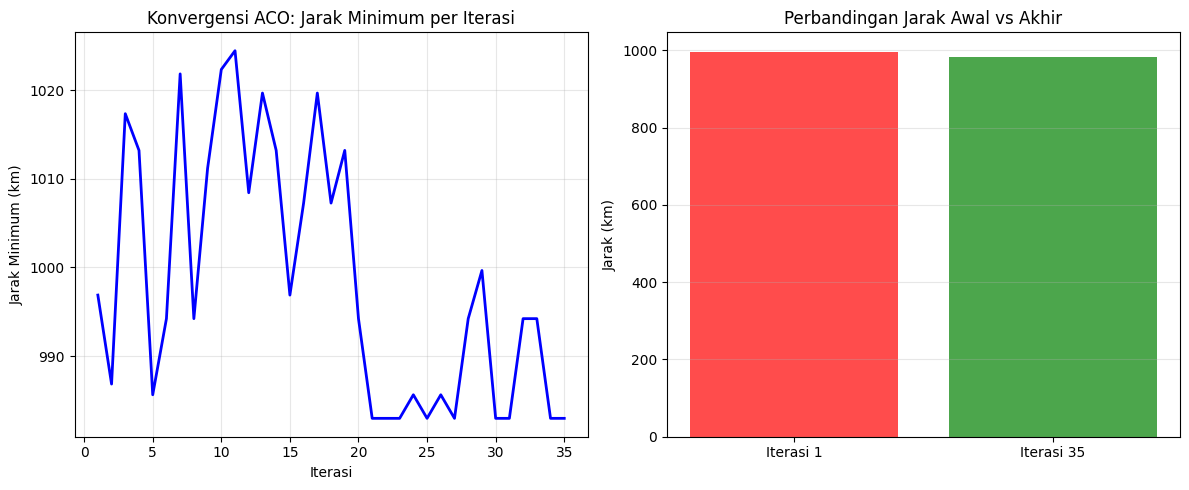


Grafik konvergensi telah disimpan sebagai 'grafik_konvergensi_aco.png'

VERIFIKASI DENGAN BRUTE FORCE (9 lokasi Wali Songo)
Menghitung semua kemungkinan rute...

HASIL BRUTE FORCE:
Rute terpendek: Rumah/Kos -> Sunan Ampel -> Sunan Gresik -> Sunan Giri -> Sunan Drajat -> Sunan Bonang -> Sunan Muria -> Sunan Kudus -> Sunan Gunung Jati -> Sunan Kalijaga -> Rumah/Kos
Jarak: 982.99 km

PERBANDINGAN DENGAN ACO:
Jarak ACO: 982.99 km
Jarak Brute Force: 982.99 km
Selisih: 0.00 km
Persentase error: 0.00%

IMPLEMENTASI SELESAI


In [ ]:
# Install library yang diperlukan
!pip install folium > /dev/null
!pip install haversine > /dev/null

import numpy as np
import pandas as pd
import random
import math
from haversine import haversine, Unit
import folium
from itertools import permutations

print("=== IMPLEMENTASI ANT COLONY OPTIMIZATION UNTUK RUTE ZIARAH WALI SONGO ===\n")

# ===========================================
# 1. DATA LOKASI WALI SONGO DAN RUMAH/KOS
# ===========================================
# Data koordinat Wali Songo (latitude, longitude) - data aktual dapat disesuaikan
lokasi_walisongo = {
    'Rumah/Kos': (-7.802, 110.366),  # Contoh lokasi UAD Yogyakarta
    'Sunan Gresik': (-7.155, 112.656),
    'Sunan Ampel': (-7.245, 112.738),
    'Sunan Bonang': (-6.899, 112.065),
    'Sunan Drajat': (-6.892, 112.255),
    'Sunan Kudus': (-6.805, 110.842),
    'Sunan Giri': (-7.167, 112.631),
    'Sunan Kalijaga': (-7.679, 110.261),
    'Sunan Muria': (-6.755, 110.896),
    'Sunan Gunung Jati': (-6.737, 108.550)
}

# Hitung matriks jarak antar lokasi (dalam km)
n_lokasi = len(lokasi_walisongo)
lokasi_list = list(lokasi_walisongo.keys())
jarak_matrix = np.zeros((n_lokasi, n_lokasi))

for i in range(n_lokasi):
    for j in range(n_lokasi):
        if i != j:
            jarak_matrix[i][j] = haversine(
                lokasi_walisongo[lokasi_list[i]],
                lokasi_walisongo[lokasi_list[j]],
                unit=Unit.KILOMETERS
            )

# Tampilkan matriks jarak
print("MATRIKS JARAK ANTAR LOKASI (km):")
jarak_df = pd.DataFrame(jarak_matrix, index=lokasi_list, columns=lokasi_list)
print(jarak_df.round(2))
print("\n" + "="*80 + "\n")

# ===========================================
# 2. IMPLEMENTASI ALGORITMA ACO
# ===========================================
class AntColonyOptimization:
    def __init__(self, jarak_matrix, parameter):
        self.jarak_matrix = jarak_matrix
        self.n = len(jarak_matrix)

        # Parameter dari soal
        self.Q = parameter['Q']  # 100
        self.rho = parameter['rho']  # 0.05
        self.ant_size = parameter['antSize']  # 17
        self.max_iter = parameter['t_max']  # 35

        # Parameter tambahan untuk ACO
        self.alpha = 1.0  # pengaruh pheromone
        self.beta = 2.0   # pengaruh jarak (heuristic)

        # Inisialisasi pheromone
        self.pheromone = np.ones((self.n, self.n))

        # History untuk tracking
        self.best_rute_history = []
        self.best_jarak_history = []
        self.minimum_global = float('inf')
        self.best_rute_global = None

    def run(self):
        print("MENJALANKAN ALGORITMA ACO...")
        print(f"Parameter: Q={self.Q}, ρ={self.rho}, antSize={self.ant_size}, t_max={self.max_iter}")
        print("-" * 60)

        for iterasi in range(self.max_iter):
            semua_rute = []
            semua_jarak = []

            # Setiap semut mencari rute
            for ant in range(self.ant_size):
                # Mulai dari Rumah/Kos (index 0)
                rute = [0]
                belum_dikunjungi = list(range(1, self.n))

                # Bangun rute
                while belum_dikunjungi:
                    lokasi_sekarang = rute[-1]

                    # Hitung probabilitas untuk setiap lokasi yang belum dikunjungi
                    probabilitas = []
                    for next_loc in belum_dikunjungi:
                        pheromone_val = self.pheromone[lokasi_sekarang][next_loc] ** self.alpha
                        heuristic_val = (1.0 / max(self.jarak_matrix[lokasi_sekarang][next_loc], 0.001)) ** self.beta
                        probabilitas.append(pheromone_val * heuristic_val)

                    # Normalisasi probabilitas
                    total = sum(probabilitas)
                    probabilitas = [p/total for p in probabilitas] if total > 0 else [1/len(probabilitas)]*len(probabilitas)

                    # Pilih lokasi berikutnya secara probabilistik
                    next_index = np.random.choice(len(belum_dikunjungi), p=probabilitas)
                    next_loc = belum_dikunjungi.pop(next_index)
                    rute.append(next_loc)

                # Kembali ke Rumah/Kos
                rute.append(0)

                # Hitung total jarak
                total_jarak = 0
                for i in range(len(rute)-1):
                    total_jarak += self.jarak_matrix[rute[i]][rute[i+1]]

                semua_rute.append(rute)
                semua_jarak.append(total_jarak)

            # Cari rute terbaik pada iterasi ini
            idx_terbaik = np.argmin(semua_jarak)
            jarak_terbaik = semua_jarak[idx_terbaik]
            rute_terbaik = semua_rute[idx_terbaik]

            # Update history
            self.best_rute_history.append(rute_terbaik)
            self.best_jarak_history.append(jarak_terbaik)

            # Update minimum global
            if jarak_terbaik < self.minimum_global:
                self.minimum_global = jarak_terbaik
                self.best_rute_global = rute_terbaik

            # Update pheromone: Evaporasi
            self.pheromone = (1 - self.rho) * self.pheromone

            # Update pheromone: Deposit (hanya untuk rute terbaik iterasi ini)
            delta_tau = self.Q / jarak_terbaik
            for i in range(len(rute_terbaik)-1):
                from_node = rute_terbaik[i]
                to_node = rute_terbaik[i+1]
                self.pheromone[from_node][to_node] += delta_tau
                self.pheromone[to_node][from_node] += delta_tau  # symmetric

            # Progress report setiap 5 iterasi
            if (iterasi + 1) % 5 == 0:
                print(f"Iterasi {iterasi+1}/{self.max_iter}: Jarak terbaik = {jarak_terbaik:.2f} km")

        return self.best_jarak_history, self.best_rute_global, self.minimum_global

    def get_nama_rute(self, rute_index):
        """Konversi rute dari index ke nama lokasi"""
        return [lokasi_list[i] for i in rute_index]

# ===========================================
# 3. JALANKAN ALGORITMA
# ===========================================
# Set parameter sesuai soal
parameter_aco = {
    'Q': 100,
    'rho': 0.05,
    'antSize': 17,
    't_max': 35
}

# Inisialisasi dan jalankan ACO
aco = AntColonyOptimization(jarak_matrix, parameter_aco)
jarak_history, best_rute, min_global = aco.run()

print("\n" + "="*80)
print("HASIL AKHIR ACO")
print("="*80)

# Tampilkan rute terbaik dalam bentuk nama lokasi
nama_rute = aco.get_nama_rute(best_rute)
print(f"\nRUTE TERPENDEK YANG DITEMUKAN:")
for i, lokasi in enumerate(nama_rute):
    print(f"{i+1}. {lokasi}")

print(f"\nTOTAL JARAK: {min_global:.2f} km")

# ===========================================
# 4. TABEL ITERASI vs NILAI MINIMUM
# ===========================================
print("\n" + "="*80)
print("TABEL ITERASI vs NILAI MINIMUM")
print("="*80)

# Buat tabel
tabel_iterasi = pd.DataFrame({
    'Iterasi': list(range(1, len(jarak_history) + 1)),
    'Jarak Minimum (km)': [round(j, 2) for j in jarak_history]
})

# Tampilkan tabel (10 baris pertama dan terakhir)
print("\n10 ITERASI PERTAMA:")
print(tabel_iterasi.head(10).to_string(index=False))

print("\n\n10 ITERASI TERAKHIR:")
print(tabel_iterasi.tail(10).to_string(index=False))

print(f"\nNILAI MINIMUM GLOBAL/AKHIR: {min_global:.2f} km")

# ===========================================
# 5. VISUALISASI PETA RUTE
# ===========================================
print("\n" + "="*80)
print("VISUALISASI PETA RUTE TERPENDEK")
print("="*80)

# Buat peta
m = folium.Map(location=lokasi_walisongo['Rumah/Kos'], zoom_start=9)

# Tambahkan marker untuk setiap lokasi
colors = ['red', 'blue', 'green', 'purple', 'orange',
          'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen']

for i, (nama, koordinat) in enumerate(lokasi_walisongo.items()):
    color_idx = i % len(colors)
    folium.Marker(
        location=koordinat,
        popup=nama,
        icon=folium.Icon(color=colors[color_idx], icon='info-sign')
    ).add_to(m)

# Tambahkan garis untuk rute terbaik
rute_koordinat = [lokasi_walisongo[nama] for nama in nama_rute]
folium.PolyLine(
    rute_koordinat,
    color='red',
    weight=3,
    opacity=0.8,
    popup='Rute Terpendek ACO'
).add_to(m)

# Simpan dan tampilkan peta
m.save('rute_walisongo.html')
print("Peta telah disimpan sebagai 'rute_walisongo.html'")
print("Buka file tersebut di browser untuk melihat visualisasi rute.")

# ===========================================
# 6. ANALISIS STATISTIK
# ===========================================
print("\n" + "="*80)
print("ANALISIS STATISTIK")
print("="*80)

print(f"Jarak minimum awal (iterasi 1): {jarak_history[0]:.2f} km")
print(f"Jarak minimum akhir (iterasi {len(jarak_history)}): {jarak_history[-1]:.2f} km")
print(f"Perbaikan: {(jarak_history[0] - jarak_history[-1]):.2f} km ({((jarak_history[0] - jarak_history[-1])/jarak_history[0]*100):.1f}%)")
print(f"Jarak terpendek global: {min_global:.2f} km")

# Visualisasi konvergensi
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot konvergensi
plt.subplot(1, 2, 1)
plt.plot(range(1, len(jarak_history)+1), jarak_history, 'b-', linewidth=2)
plt.xlabel('Iterasi')
plt.ylabel('Jarak Minimum (km)')
plt.title('Konvergensi ACO: Jarak Minimum per Iterasi')
plt.grid(True, alpha=0.3)

# Plot distribusi jarak terakhir vs awal
plt.subplot(1, 2, 2)
x_pos = [1, 2]
labels = ['Iterasi 1', f'Iterasi {len(jarak_history)}']
values = [jarak_history[0], jarak_history[-1]]
plt.bar(x_pos, values, color=['red', 'green'], alpha=0.7)
plt.xticks(x_pos, labels)
plt.ylabel('Jarak (km)')
plt.title('Perbandingan Jarak Awal vs Akhir')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('grafik_konvergensi_aco.png', dpi=150)
plt.show()

print("\nGrafik konvergensi telah disimpan sebagai 'grafik_konvergensi_aco.png'")

# ===========================================
# 7. VERIFIKASI DENGAN BRUTE FORCE (untuk validasi)
# ===========================================
print("\n" + "="*80)
print("VERIFIKASI DENGAN BRUTE FORCE (9 lokasi Wali Songo)")
print("="*80)

# Catatan: Brute force untuk 9! permutasi (362880) masih mungkin
if len(lokasi_list) - 1 <= 9:  # -1 untuk exclude rumah/kos
    lokasi_tanpa_rumah = lokasi_list[1:]  # Exclude rumah/kos
    best_bf_distance = float('inf')
    best_bf_route = None

    # Generate semua permutasi
    print("Menghitung semua kemungkinan rute...")
    for i, perm in enumerate(permutations(lokasi_tanpa_rumah)):
        # Buat rute lengkap: Rumah -> permutasi -> Rumah
        rute_bf = ['Rumah/Kos'] + list(perm) + ['Rumah/Kos']

        # Hitung jarak
        total_distance = 0
        for j in range(len(rute_bf)-1):
            from_loc = rute_bf[j]
            to_loc = rute_bf[j+1]
            total_distance += jarak_matrix[lokasi_list.index(from_loc)][lokasi_list.index(to_loc)]

        if total_distance < best_bf_distance:
            best_bf_distance = total_distance
            best_bf_route = rute_bf

    print(f"\nHASIL BRUTE FORCE:")
    print(f"Rute terpendek: {' -> '.join(best_bf_route)}")
    print(f"Jarak: {best_bf_distance:.2f} km")

    print(f"\nPERBANDINGAN DENGAN ACO:")
    print(f"Jarak ACO: {min_global:.2f} km")
    print(f"Jarak Brute Force: {best_bf_distance:.2f} km")
    print(f"Selisih: {abs(min_global - best_bf_distance):.2f} km")
    print(f"Persentase error: {abs(min_global - best_bf_distance)/best_bf_distance*100:.2f}%")
else:
    print("Jumlah lokasi terlalu banyak untuk brute force. Hasil ACO diterima.")

print("\n" + "="*80)
print("IMPLEMENTASI SELESAI")
print("="*80)